Fitted parameters:
A = -7.89, B = 1706.40, gamma = -2.0502


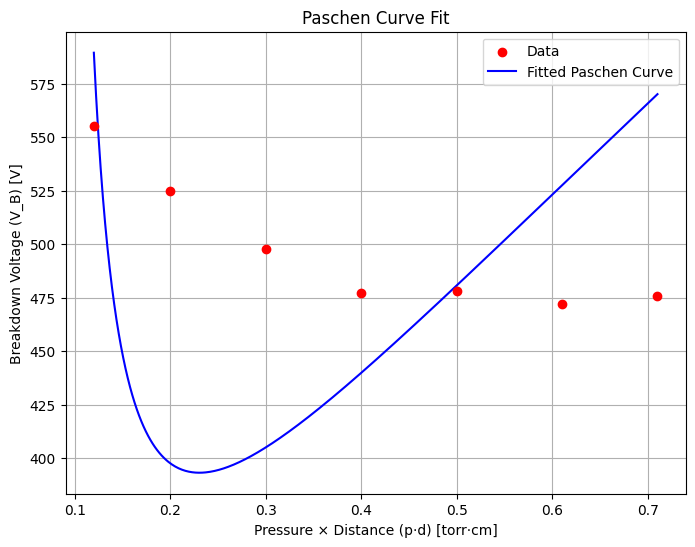

In [7]:
import numpy as np
import cmath as cm
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Paschen curve formula
def paschen_curve(pd, A, B, gamma):
    """
    Paschen curve formula for breakdown voltage V_B.
    
    Parameters:
    pd (float): Product of pressure and distance (p*d)
    A (float): Constant related to ionization (gas-specific)
    B (float): Constant related to excitation potential (gas-specific)
    gamma (float): Secondary electron emission coefficient
    
    Returns:
    float: Breakdown voltage V_B
    """


    return B*pd/np.log(np.absolute(A*pd/(np.log(np.absolute(1+1/(gamma))))))

# Example data for pressure (p), distance (d), and breakdown voltage (V_B)
# Replace these with your data
pressure = np.array([0.12, 0.2, 0.3, 0.4, 0.5, 0.61, 0.71])  # Example pressures
distance = 1  # Example electrode distance in cm (you can adjust this)
pd_values = pressure * distance  # Product of p and d
breakdown_voltage = np.array([555,525,498,477,478,472,476])  # Example breakdown voltages in V

# Initial guesses for A, B, and gamma (adjust for Argon/Nitrogen)
initial_guess = [112, 273, 20]  # Example values for air (adjust for Argon/Nitrogen)

# Curve fitting
params, covariance = curve_fit(paschen_curve, pd_values, breakdown_voltage, p0=initial_guess)

# Extract fitted parameters
A_fitted, B_fitted, gamma_fitted = params
print(f"Fitted parameters:\nA = {A_fitted:.2f}, B = {B_fitted:.2f}, gamma = {gamma_fitted:.4f}")

# Generate fitted curve for plotting
pd_fit = np.linspace(min(pd_values), max(pd_values), 500)
V_fit = paschen_curve(pd_fit, A_fitted, B_fitted, gamma_fitted)

# Plotting the results
plt.figure(figsize=(8, 6))
plt.scatter(pd_values, breakdown_voltage, color="red", label="Data", zorder=3)
plt.plot(pd_fit, V_fit, label="Fitted Paschen Curve", color="blue")
plt.title("Paschen Curve Fit")
plt.xlabel("Pressure × Distance (p·d) [torr·cm]")
plt.ylabel("Breakdown Voltage (V_B) [V]")
plt.legend()
plt.grid(True)
plt.show()
